In [7]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install plotly.express as px

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [9]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import pandas_datareader as web


In [11]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

df = pdr.get_data_yahoo('DMART.NS', start='2015-1-1', end='2022-12-31')

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-21,600.000000,648.900024,558.299988,641.599976,641.599976,85728445
2017-03-22,641.549988,657.450012,625.099976,638.549988,638.549988,15817671
2017-03-23,637.900024,648.000000,628.150024,634.849976,634.849976,4690121
2017-03-24,635.450012,640.450012,612.599976,616.900024,616.900024,4865013
2017-03-27,615.000000,623.000000,602.349976,614.400024,614.400024,3535098


In [12]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-21,600.000000,648.900024,558.299988,641.599976,641.599976,85728445
1,2017-03-22,641.549988,657.450012,625.099976,638.549988,638.549988,15817671
2,2017-03-23,637.900024,648.000000,628.150024,634.849976,634.849976,4690121
3,2017-03-24,635.450012,640.450012,612.599976,616.900024,616.900024,4865013
4,2017-03-27,615.000000,623.000000,602.349976,614.400024,614.400024,3535098


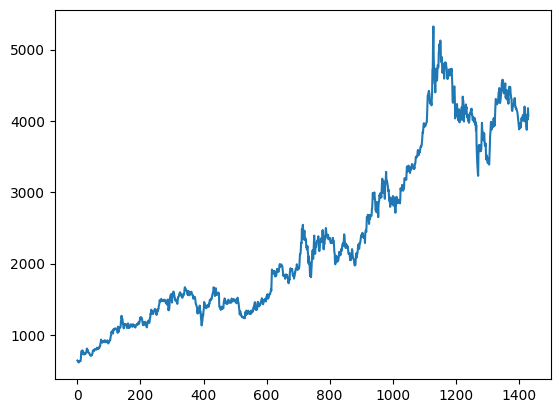

In [13]:
plt.plot(df.Close)

In [14]:
ma100=df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1426    4234.431516
1427    4232.101018
1428    4229.687517
1429    4228.939016
1430    4227.235515
Name: Close, Length: 1431, dtype: float64

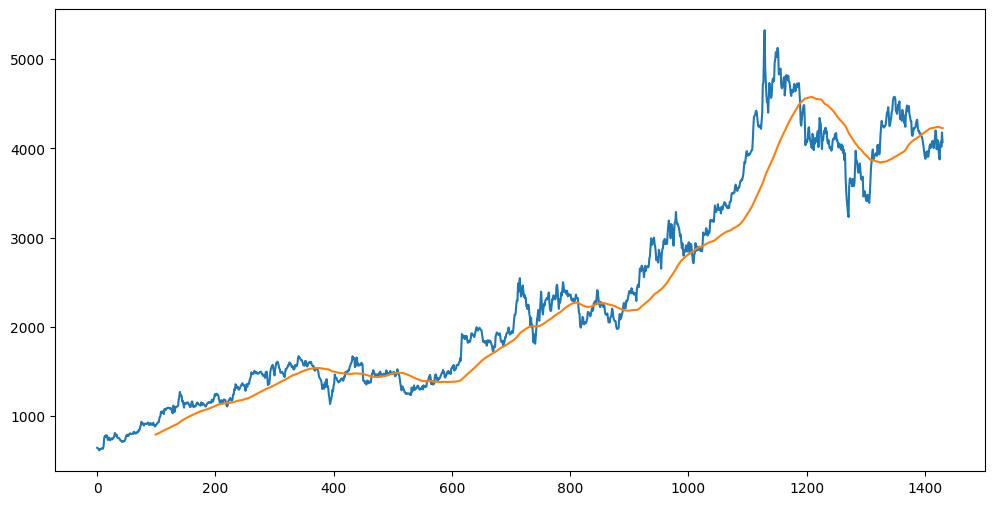

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [16]:
ma200=df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1426    4039.121764
1427    4038.874764
1428    4038.480013
1429    4038.528512
1430    4037.877511
Name: Close, Length: 1431, dtype: float64

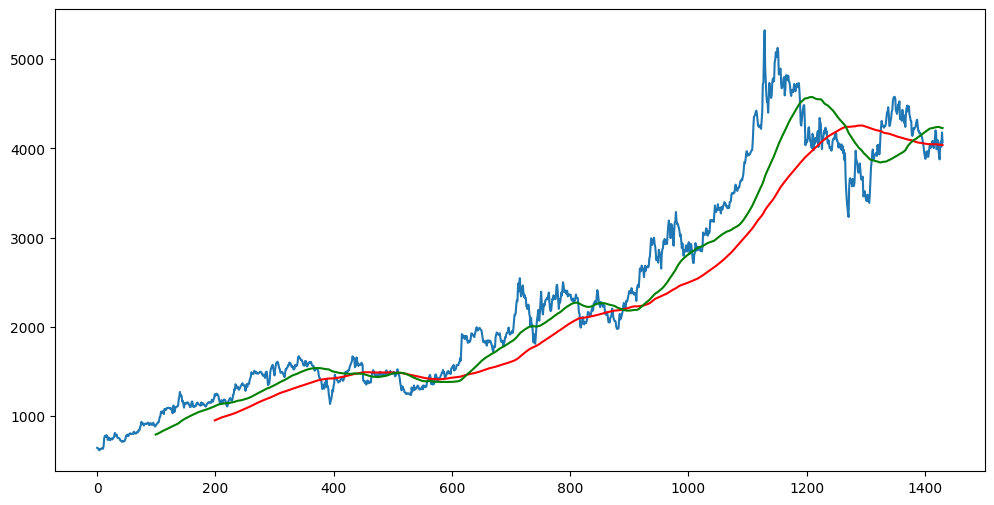

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'g')

In [18]:
df.shape

(1431, 7)

In [19]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*.80)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*.20):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1144, 1)
(1145, 1)


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.00577573],
       [0.00512809],
       [0.00434241],
       ...,
       [0.84568991],
       [0.87632047],
       [0.88532392]])

In [22]:
data_training.shape

(1144, 1)

In [23]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [24]:
x_train.shape

(1044, 100, 1)

In [25]:
pip install keras.layers

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers


In [26]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))

model.add(LSTM(units=150, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=200, activation='relu', return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(units=250, activation='relu'))
model.add(Dropout(0.7))

model.add(Dense(units=1))


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 150)          150600    
                                                                 
 dropout_1 (Dropout)         (None, 100, 150)          0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 200)          280800    
                                                                 
 dropout_2 (Dropout)         (None, 100, 200)          0         
                                                                 
 lstm_3 (LSTM)               (None, 250)               4

In [29]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100)


Epoch 1/100
20/33 [=================>............] - ETA: 15s - loss: 0.0394

KeyboardInterrupt: 

In [ ]:
model.save('keras_model.h5')

NameError: name 'model' is not defined

In [ ]:
past_100_days=data_training.tail(100)


In [ ]:
final_df=past_100_days.append(data_testing,ignore_index= True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
final_df.head()

,Close
0,63.215000
1,61.667500
2,61.195000
3,57.310001
4,56.092499


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.05656483],
       [0.04427503],
       [0.04052257],
       [0.00966905],
       [0.        ],
       [0.04469198],
       [0.0419918 ],
       [0.06764351],
       [0.04639945],
       [0.0604364 ],
       [0.05940397],
       [0.03283898],
       [0.04082037],
       [0.03383169],
       [0.07564478],
       [0.06960907],
       [0.08279233],
       [0.08660432],
       [0.09704768],
       [0.12444655],
       [0.11924474],
       [0.12373183],
       [0.11600849],
       [0.10435404],
       [0.08735879],
       [0.10270616],
       [0.10058174],
       [0.11634604],
       [0.11674315],
       [0.10762998],
       [0.12579669],
       [0.13784818],
       [0.12845715],
       [0.13657754],
       [0.14531341],
       [0.15140868],
       [0.15758333],
       [0.17027024],
       [0.17995914],
       [0.17281159],
       [0.16534636],
       [0.16909885],
       [0.16546548],
       [0.17985983],
       [0.1762464 ],
       [0.18833764],
       [0.18361231],
       [0.187

In [ ]:
input_data.shape

(705, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(605, 100, 1)
(605,)


In [ ]:
y_predicted=model.predict(x_test)


19/19 [==============================] - 2s 86ms/step


In [ ]:
y_test

array([0.43695282, 0.44977866, 0.42315407, 0.4520222 , 0.46790562,
       0.46709158, 0.46470905, 0.47229339, 0.47344491, 0.49383529,
       0.54224001, 0.55405326, 0.54585344, 0.55933451, 0.5473227 ,
       0.54571451, 0.57932771, 0.62014809, 0.59807015, 0.5145234 ,
       0.51515875, 0.45051326, 0.48625094, 0.45583419, 0.44400106,
       0.4706852 , 0.47211471, 0.44503346, 0.43081779, 0.40302181,
       0.42875299, 0.44249211, 0.40524554, 0.41398141, 0.44622473,
       0.46750851, 0.4605992 , 0.47425895, 0.48204185, 0.45210157,
       0.47973874, 0.45321347, 0.46846153, 0.46758794, 0.48347136,
       0.54247825, 0.51627059, 0.51698537, 0.51317333, 0.49975182,
       0.47560908, 0.48775989, 0.4826772 , 0.47378246, 0.46814386,
       0.46822329, 0.4805329 , 0.43764767, 0.47036753, 0.4190641 ,
       0.41834931, 0.43161201, 0.46742907, 0.49983126, 0.4971311 ,
       0.47830923, 0.47552965, 0.50348443, 0.50126077, 0.50165788,
       0.50991726, 0.50269028, 0.49188955, 0.49673399, 0.48640

In [ ]:
y_predicted

array([[0.33915842],
       [0.35233012],
       [0.36761534],
       [0.38372916],
       [0.39975172],
       [0.4151647 ],
       [0.42958802],
       [0.44267964],
       [0.45425057],
       [0.46417403],
       [0.47264332],
       [0.4805086 ],
       [0.48861796],
       [0.49737015],
       [0.5069218 ],
       [0.51696575],
       [0.5269744 ],
       [0.5368277 ],
       [0.54695785],
       [0.5573554 ],
       [0.56660694],
       [0.57335573],
       [0.57595015],
       [0.57401323],
       [0.5675849 ],
       [0.5570075 ],
       [0.54317653],
       [0.52734834],
       [0.5105079 ],
       [0.49336633],
       [0.47622126],
       [0.45968372],
       [0.44458392],
       [0.43117756],
       [0.41962892],
       [0.4103765 ],
       [0.40407112],
       [0.40104   ],
       [0.40145355],
       [0.40522403],
       [0.41156086],
       [0.4198039 ],
       [0.4289813 ],
       [0.43834922],
       [0.44730556],
       [0.4556124 ],
       [0.46391732],
       [0.472

In [ ]:
scaler.scale_

: 

In [ ]:
scale_factor=1/scaler.scale_
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

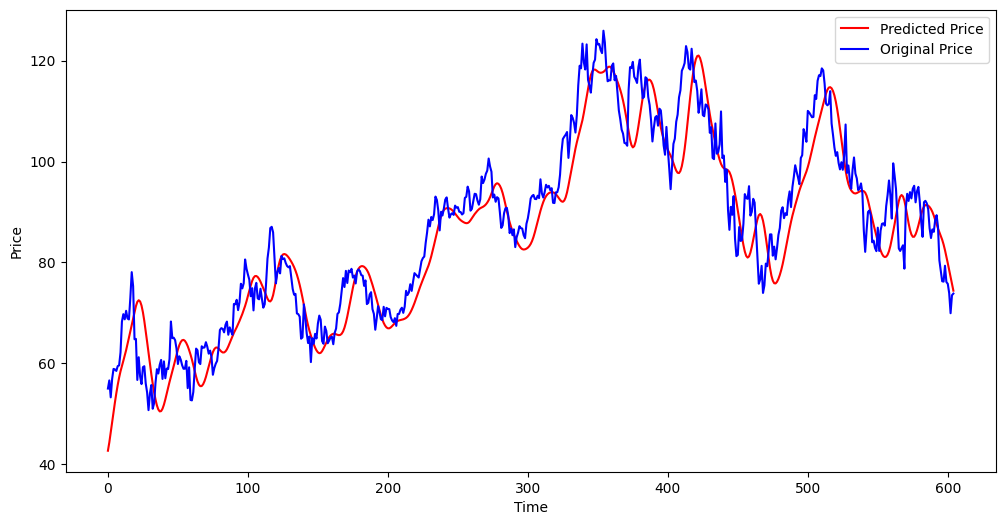

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted,'r',label='Predicted Price')
plt.plot(y_test,'b',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted,'r',label='Predicted Price')
plt.plot(y_test,'b',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'g')


NameError: name 'plt' is not defined

In [ ]:
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as dt
import pandas_datareader as web

In [ ]:
#df=web.DataReader(ticker,'yahoo',start,end)
#import streamlit as st

import yfinance as yf
import streamlit as st

st.title('Stock Trend Prediction')
ticker=st.text_input('Enter Ticker Name','AAPL')

start=st.date_input('Start', value=pd.to_datetime('2010-01-01'))
end=st.date_input('End', value=pd.to_datetime('today'))


df=yf.download(ticker,start,end)

#import yfinance as yfin

#yfin.pdr_override()
  
#df = pdr.get_data_yahoo('DMART.NS', start='2015-1-1', end='2022-12-31')

#start=st.date_input('Start', value=pd.to_datetime('2010-01-01'))
#end=st.date_input('End', value=pd.to_datetime('today'))


#df=yf.download("AAPL",start,end)

2023-05-05 21:40:56.340 
  command:

    streamlit run C:\Users\KALYAN\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]


NameError: name 'pd' is not defined

In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
df['SMA_100']=ta.SMA(df['Close'],100)

NameError: name 'ta' is not defined

In [ ]:
plt.plot(df['Close'])
plt.plot(df['SMA_100'])

NameError: name 'plt' is not defined

In [ ]:
df['EMA_100']=ta.EMA(df['Close'],100)

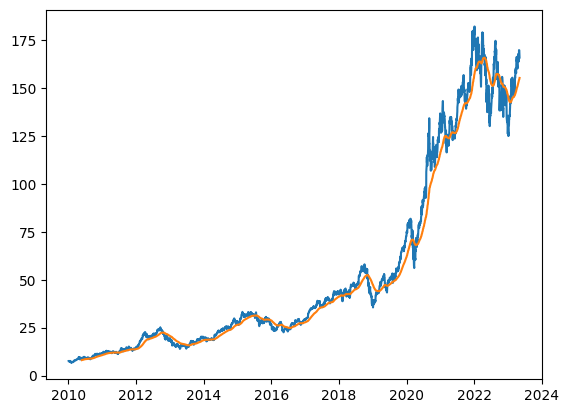

In [ ]:
plt.plot(df['Close'])
plt.plot(df['EMA_100'])

In [ ]:
df['RSI']=ta.RSI(df['Close'])

In [ ]:
fig,axs=plt.subplot(2,1,gridspec_kw={'height_ratios':[3,1]},figsize=(10,6))
axs[0].plot(df['Close'])
axs[1].axhline(y=60,color='r')
axs[1].axhline(y=40,color='g')
axs[1].plot(df['RSI'],color='orange')

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [ ]:
df['LINEARREG']=ta.LINEARRED(df['Close'],200)

AttributeError: module 'talib' has no attribute 'LINEARRED'

KeyError: 'LINEARREG'

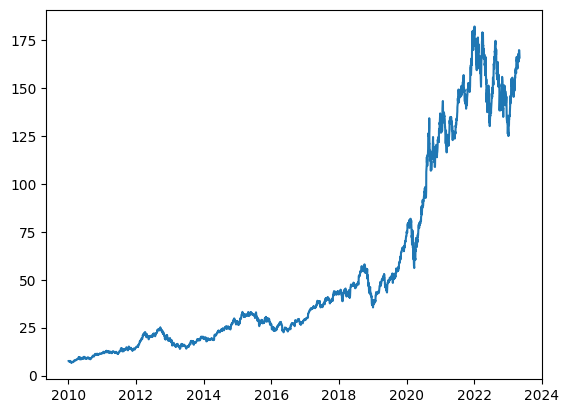

In [ ]:
plt.plot(df['Close'])
plt.plot(df['LINEARREG'])

In [ ]:
#import yfinance as yfin

#yfin.pdr_override()
  
#df = pdr.get_data_yahoo('DMART.NS', start='2015-1-1', end='2022-12-31')



import yfinance as yf
import streamlit as st
import talib as ta


st.title('Stock Trend Prediction')
ticker=st.text_input('Enter Ticker Name','AAPL')

start=st.date_input('Start', value=pd.to_datetime('2010-01-01'))
end=st.date_input('End', value=pd.to_datetime('today'))


df=yf.download(ticker,start,end)
macd,macd_signal,macd_hist=ta.MACD(data['Close'])
 
fig, axs=plt.subplot(2,1,gridspec_kw={'height_ratios':[3,1]}, figsize=(10,6))
c=['red' if cl<0 else 'green' for cl in macd_hist]

axs[0].plot(data['Close'])
axs[1].plot(macd,'b--')
axs[1].plot(macd_signal,color='orange')
axs[1].plot(macd_hist.index,macd_hist,color=c)

[*********************100%***********************]  1 of 1 completed


NameError: name 'data' is not defined

In [ ]:
pip install ta

In [ ]:
import pandas as pd
import talib as ta
import numpy as np
import streamlit as st
import yfinance as yf

import talib as ta
from talib import RSI
from talib import MOM


st.title('Stock Trend Prediction')
ticker=st.text_input('Enter Ticker Name','AAPL')

start=st.date_input('Start', value=pd.to_datetime('2010-01-01'))
end=st.date_input('End', value=pd.to_datetime('today'))

df=yf.download(ticker,start,end)
print(df.head())




from talib import RSI

# Calculate RSI values using the ta library
rsi = RSI(df["Close"], window=14).rsi()

# Print the RSI values
print(rsi)


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.496293  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.507527  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.404014  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.392175  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.434672  447610800


TypeError: RSI() got an unexpected keyword argument 'window'

In [ ]:
pip install mplfinance

  Using cached mplfinance-0.12.9b7-py3-none-any.whl (73 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import mplfinance as mpf
import matplotlib.pyplot as plt

axs=plt.subplot(2,1,gridspec_kw={'height_ratios':[3,1]}, figsize=(10,6))

colors=mpf.make_marketcolors(up='#00ff00',down='#ff0000')

mpf_style=mpf.make_mpf_style(base_mpf_style='mpf',marketcolors=colors)

mpf.plot(data,type='candle',ax=axs[0],style=mpf_style)



ModuleNotFoundError: No module named 'mplfinance'

In [ ]:
import talib as ta
from talib import SMA,EMA,MA
import backtesting
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA,AAPL

class MySMAStrategy(Strategy):
    def init(self):
        price=self.data.Close
        self.ma1=self.I(SMA,price,50)
        self.ma2=self.I(SMA,price,100)

    def next(self):
        if crossover(self.ma1,self.ma2):
            self.buy()
        elif crossover(self.ma2,self.ma1):
            self.sell()



backtest=Backtest(AAPL,MySMAStrategy,commission=.002,exclusive_orders=True)
stats=backtest.run()


#print(stats)used for printing the returns


backtest.plot()



ImportError: cannot import name 'AAPL' from 'backtesting.test' (c:\Users\KALYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\backtesting\test\__init__.py)

In [ ]:
pip install yfinance

[*********************100%***********************]  1 of 1 completed


c:\Users\KALYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


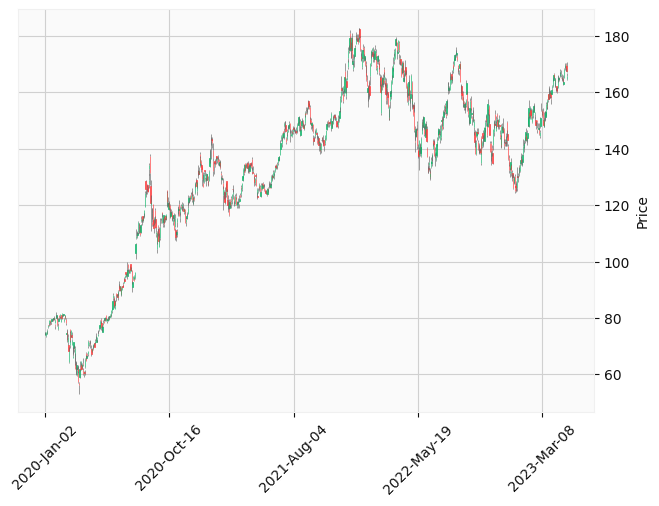

TypeError: kwarg "style" validator returned False for value: "<module 'yfinance' from 'c:\\Users\\KALYAN\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\yfinance\\__init__.py'>"
    def _valid_mpf_style(value):
    if value in available_styles():
        return True
    if not isinstance(value,dict):
        return False
    if 'marketcolors' not in value:
        return False
    if not isinstance(value['marketcolors'],dict):
        return False
    # {'candle': {'up': 'b', 'down': 'g'},
    #  'edge': {'up': 'k', 'down': 'k'},
    #  'wick': {'up': 'k', 'down': 'k'},
    #  'ohlc': {'up': 'k', 'down': 'k'},
    #  'volume': {'up': '#1f77b4', 'down': '#1f77b4'},
    #  'vcedge': {'up': '#1f77b4', 'down': '#1f77b4'},
    #  'vcdopcod': False,
    #  'alpha': 0.9}
    for item in ('candle','edge','wick','ohlc','volume'):
        if item not in value['marketcolors']:
            return False
        itemcolors = value['marketcolors'][item]
        if not isinstance(itemcolors,dict):
            return False
        if 'up' not in itemcolors or 'down' not in itemcolors:
            return False
    return True

In [ ]:
import matplotlib.pyplot as plt
import pandas_datareader as web
import mplfinance as mpf
import datetime as dt
import streamlit as st
import yfinance


ticker=('AAPL')

start=st.date_input('Start', value=pd.to_datetime('2020-01-01'))
end=st.date_input('End', value=pd.to_datetime('today'))


df=yf.download(ticker,start,end)



mpf.plot(df,type="candle",style="yahoo")
mpf.plot(df,type="candle",style=yfinance, volume=True)

In [ ]:
pip install pystan
pip install ephem
pip install prophet
from fbprophet import Prophet
from fbprophet import plot_plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

394328000000
170782000000
6.15
130541000000


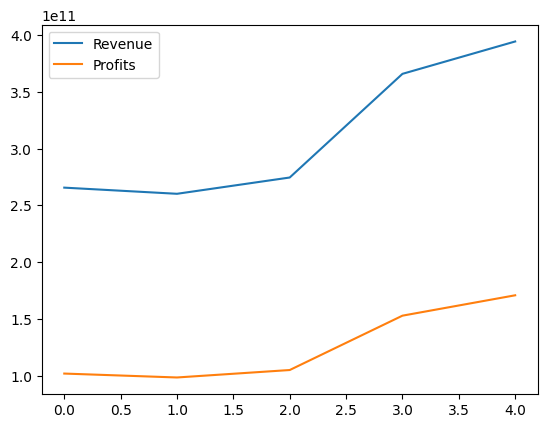

In [ ]:
'''analyzing financial statements'''


import requests
import matplotlib.pyplot as plt
import requests

api_key='c14242ae99eb8ddd4cfbe2a0cd9758f1'

company='AAPL'
years=10

income_statement=requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}")

income_statement=income_statement.json()


print(income_statement[0]['revenue'])                            
print(income_statement[0]['grossProfit'])
print(income_statement[0]['eps'])
print(income_statement[0]['ebitda'])

                             

revenues=list(reversed([income_statement[i]['revenue'] for i in range(len(income_statement))])) 
profits=list(reversed([income_statement[i]['grossProfit'] for i in range(len(income_statement))]))

plt.plot(revenues, label='Revenue')
plt.plot(profits,label='Profits')
plt.legend(loc="upper left")
plt.show()



In [ ]:
'''neuralnineprophetprediction'''

                          
'''in google collab'''

pip install pystan~=2.14
pip install fbprophet
pip install pandas_datareader

start=dt.datetime(2010,1,1)
end=dt.datetime.now()

data=web.Datareader('TSLA','yahoo',start,end)


data.to_csv('stock_data.csv')

import pandas as pd

data=pd.read_csv('stock_data.csv')

data=data[['Date','Close']]

from fbprophet import Prophet

prophet=Prophet(daily_seasonality=True)
prophet.fit(data)

future_dates=prophet.make_future_dataframe(periods=365)
predictions=prophet.predict(future_dates)

from fbprophet.plot import plot_plotly
plot_plotly(prophet,predictions)


SyntaxError: invalid syntax (2234133045.py, line 6)

[*********************100%***********************]  1 of 1 completed


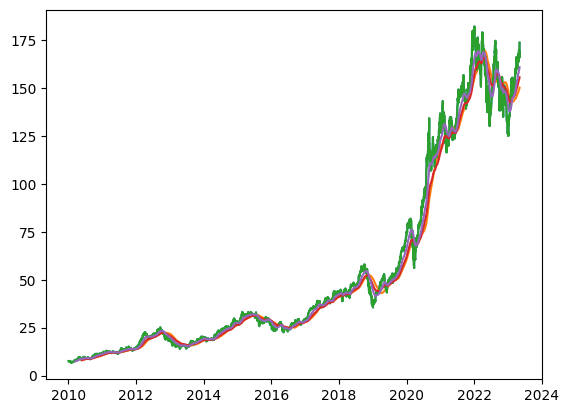

In [ ]:
import pandas_datareader as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import talib as ta



ticker=st.text_input('Enter Ticker Name','AAPL')

start=st.date_input('Start', value=pd.to_datetime('2010-01-01'))
end=st.date_input('End', value=pd.to_datetime('today'))

data=yf.download(ticker,start,end)

data['SMA_100']=ta.SMA(data['Close'],100)

plt.plot(data['Close'])
plt.plot(data['SMA_100'])

data['EMA_100']=ta.EMA(data['Close'],100)
data['EMA_50']=ta.EMA(data['Close'],50)
plt.plot(data['Close'])                           
plt.plot(data['EMA_100'])
plt.plot(data['EMA_50'])

In [ ]:
pip install pandas


[*********************100%***********************]  1 of 1 completed


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

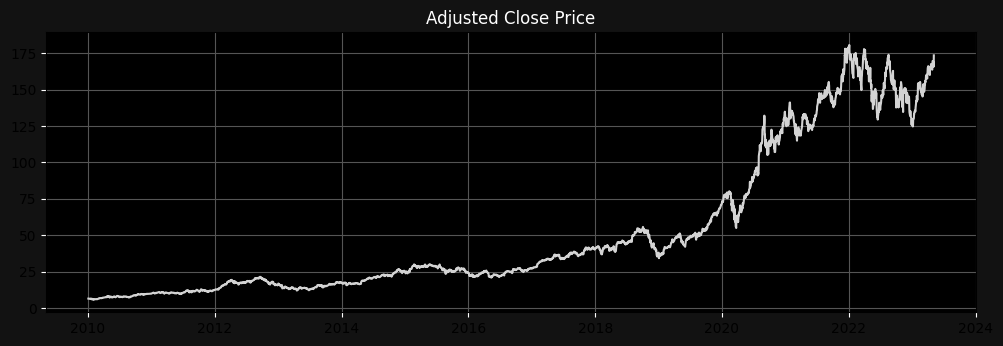

In [ ]:

import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt
from pandas import DataFrame

ticker=st.text_input('Enter Ticker Name','AAPL')

start=st.date_input('Start', value=pd.to_datetime('2010-01-01'))
end=st.date_input('End', value=pd.to_datetime('today'))


df=yf.download(ticker,start,end)

delta=data['Close'].diff(1)
delta.dropna(inplace=True)


positive=delta.copy()
negative=delta.copy()

positive[positive<0]=0
negative[negative>0]=0

windowdays=14


average_gain=positive.rolling(windowdays).mean()

average_loss=abs(negative.rolling(windowdays).mean())

relative_strength=average_gain/average_loss
RSI=100.0-(100.0/(1.0+relative_strength))

combined=df
combined['Adj Close']=data['Adj Close']
combined['RSI']=RSI

plt.figure(figsize=(12,8))
ax1=plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'],color='lightgray')
ax1.set_title('Adjusted Close Price',color='white')

ax1.grid(True,color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x',color='white')
ax1.tick_params(axis='y',color='white')

ax2=plt.subplot(212,ax1)
ax2.plot(combined.index,combined['RSI'],color='#ff0000')
ax2.axhline(0,linestyle='--', alpha=0.5,color='#ff0000')
ax2.axhline(10,linestyle='--', alpha=0.5,color='#ffaa00')
ax2.axhline(20,linestyle='--', alpha=0.5,color='#00ff00')
ax2.axhline(30,linestyle='--', alpha=0.5,color='#cccccc')                                 
ax2.axhline(70,linestyle='--', alpha=0.5,color='#cccccc')
ax2.axhline(90,linestyle='--', alpha=0.5,color='#ffaa00')
ax2.axhline(100,linestyle='--', alpha=0.5,color='#ff0000')


ax2.set_title('RSI')
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.figure.set_facecolor('#121212')
ax2.tick_params(axis='x',color='white')
ax2.tick_params(axis='y',color='white')


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
import keras_models
import tensorflow
import keras_models
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,LSTM

#Load Data

ticker=st.text_input('Enter Ticker Name','AAPL')

start=st.date_input('Start', value=pd.to_datetime('2010-01-01'))
end=st.date_input('End', value=pd.to_datetime('today'))


data=yf.download(ticker,start,end)

#prepare Data


scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))


prediction_days=60

x_train=[]
y_train=[]

for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


#build the model

model=Sequential


model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))#prediction of the next closing price


model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)


#Test The Model Accuracy on Existing Data

test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()    


ticker=st.text_input('Enter Ticker Name','AAPL')

test_start=st.date_input('Start', value=pd.to_datetime('2010-01-01'))
test_end=st.date_input('End', value=pd.to_datetime('today'))


data=yf.download(ticker,start,end)
              

test_start=dt.datetime(company,'yahoo',test_start,test_end)
actual_prices=test_data['Close'].values

                        
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)

            
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)
                        
 
#make Predictions on Test Data

x_test=[]

for x in range(prediction_days,len(model_inputs)+1):
    x_test.append(model_inputs[x-prediction_days:x,0])


x_test=np.array(x_test)              
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

#Plot The Test Predictions

plt.plot(actual_prices,color="black", label=f"acutal {company} Price")
plt.plot(predicted_prices,color="green", label=f"Predicted {company} Price")    
plt.title(f"{company}Share Price")
plt.xlabel('Time')                        
plt.ylabel(f'{company} Share Price')
plt.legend()                        
plt.show()


#Predict Next Day

real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1)) 


prediction=model.predict(real_data)
prediction=scaler.inverse_transfrom(prediction)
print(f"Prediction:{Prediction}")

[*********************100%***********************]  1 of 1 completed


TypeError: Sequential.add() missing 1 required positional argument: 'layer'

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
import keras_models
import tensorflow
from tensorflow import keras_models

from sklearn.preprocessing import MinMaxScaler
#from keras.layers import Dense,Dropout,LSTM
#from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM

#Load Data

company='KOTAKBANK'

start=dt.datetime(2012,1,1)
end=dt.datetime(2020,1,1)

data=web.DataReader(company,yahoo,start,end)

#prepare Data


scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))


prediction_days=60

x_train=[]
y_train=[]

for x in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


#build the model

model=Sequential


model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))#prediction of the next closing price


model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)


#Test The Model Accuracy on Existing Data

test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()              
              

test_start=dt.datetime(company,'yahoo'test_start,test_end)
actual_prices=test_data['Close'].values

                        
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)

            
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)
model_inputs=scaler.transform(model_inputs)
                        
 
#make Predictions on Test Data

x_test=[]

for x in range(prediction_days,len(model_inputs)+1):
    x_test.append(model_inputs[x-prediction_days:x,0])


x_test=np.array(x_test)              
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)

#Plot The Test Predictions

plt.plot(actual_prices,color="black", label=f"acutal {company} Price")
plt.plot(predicted_prices,color="green", label=f"Predicted {company} Price")    
plt.title(f"{company}Share Price")
plt.xlabel('Time')                        
plt.ylabel(f'{company} Share Price')
plt.legend()                        
plt.show()


#Predict Next Day

real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1)) 


prediction=model.predict(real_data)
prediction=scaler.inverse_transfrom(prediction)
print(f"Prediction:{Prediction}")



SyntaxError: invalid syntax. Perhaps you forgot a comma? (1608410044.py, line 69)

date: 2021-09-25
Revenue: 365817000000.0
Revenue Growth: 
Cost of Revenue: 212981000000.0
Gross Profit: 152836000000.0
R&D Expenses: 21914000000.0
SG&A Expense: 0.0
Operating Expenses: 43887000000.0
Operating Income: 108949000000.0
Interest Expense: 2645000000.0
Earnings before Tax: 109207000000.0
Income Tax Expense: 14527000000.0
Net Income - Non-Controlling int: 
Net Income - Discontinued ops: 
Net Income: 94680000000.0
Preferred Dividends: 
Net Income Com: 94680000000.0
EPS: 5.67
EPS Diluted: 5.61
Weighted Average Shs Out: 16701272000.0
Weighted Average Shs Out (Dil): 16864919000.0
Dividend per Share: 
Gross Margin: 0.417793596251678
EBITDA Margin: 0.336605461200546
EBIT Margin: 
Profit Margin: 0.258817933556942
Free Cash Flow margin: 
EBITDA: 123136000000.0
EBIT: 
Consolidated Income: 
Earnings Before Tax Margin: 0.298529045943737
Net Profit Margin: 0.258817933556942
date: 2020-09-26
Revenue: 274515000000.0
Revenue Growth: 0.0551208037698
Cost of Revenue: 169559000000.0
Gross Profi

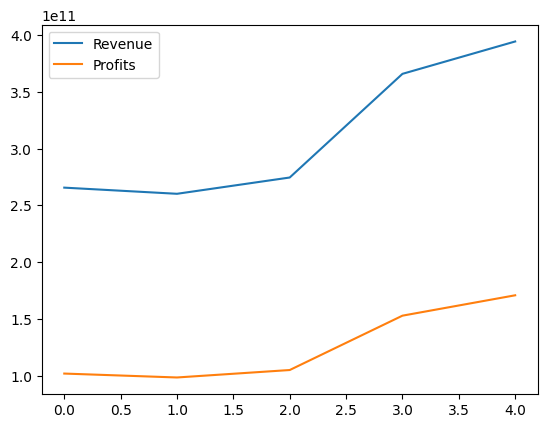

In [ ]:
import requests
import yfinance

# Set up the API endpoint and parameters
api_key = "c14242ae99eb8ddd4cfbe2a0cd9758f1"  # replace with your own API key
ticker = "AAPL"  # replace with the ticker symbol of the company you want to analyze
period = "yearly"  # choose either "annual" or "quarter"
statement_type = "income-statement"  # choose either "income-statement", "balance-sheet", or "cash-flow-statement"

# Send a GET request to the API endpoint
url = f"https://financialmodelingprep.com/api/v3/financials/{statement_type}/{ticker}?period={period}&apikey={api_key}"
response = requests.get(url)

# Parse the JSON response
data = response.json()

# Extract the financial statement data
statement_data = data["financials"]

# Print the financial statement data
for statement in statement_data:
    for key, value in statement.items():
        print(f"{key}: {value}")
    print("="*50)


'''analyzing financial statements'''


import requests
import matplotlib.pyplot as plt
import requests

api_key='c14242ae99eb8ddd4cfbe2a0cd9758f1'

company='AAPL'
years=10

income_statement=requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}")

income_statement=income_statement.json()


print(income_statement[0]['revenue'])                            
print(income_statement[0]['grossProfit'])
print(income_statement[0]['eps'])
print(income_statement[0]['ebitda'])

                             

revenues=list(reversed([income_statement[i]['revenue'] for i in range(len(income_statement))])) 
profits=list(reversed([income_statement[i]['grossProfit'] for i in range(len(income_statement))]))

plt.plot(revenues, label='Revenue')
plt.plot(profits,label='Profits')
plt.legend(loc="upper left")
plt.show()




